## Lab W5 : Textual Data

In [167]:
import pandas as pd

In [168]:
df = pd.read_csv('un-general-debates-blueprint.csv.gz')

In [169]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [170]:
def ngrams(tokens, n=2, sep=' ', stopwords=stopwords):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [171]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
stopwords = set(nltk.corpus.stopwords.words('english'))
#stopwords

In [173]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [174]:
pipeline = [str.lower, tokenize, ngrams]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [175]:
pipeline2 = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline2:
        tokens = transform(tokens)
    return tokens

In [176]:
def count_words(df, column='bitokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [178]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    #สร้าง worldcloud ก่อน
    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [179]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## 1. Find the top 10 word bigram from UN General Debates of years 1970 – 1990 and compare with those of years 1990 – the latest (remove stopwords first)

In [180]:
df['bitokens'] = df['text'].apply(prepare, pipeline=pipeline) 
df.sample(3)

,session,year,country,country_name,speaker,position,text,bitokens
3378,48,1993,TZA,"Tanzania, United Republic of",Mr. RWEGASIRA,NaN,"I\nam delighted to extend to you, Sir, on beha...","[delighted, extend, sir, behalf, tanzanian, de..."
3958,52,1997,CPV,Cabo Verde,Carlos Alberto Wahnon de Carvalho Veiga,Prime Minister,"﻿My delegation is pleased to greet you, Sir, a...","[delegation, pleased, greet, sir, president, g..."
6807,67,2012,HUN,Hungary,János Áder,President,﻿The rule of law is among the\ntopics before t...,"[rule, law, among, topics, sixty-seventh, sess..."


In [181]:
text_1990 = df.query(" 1970<=year and year<=1990")
text_2015 = df.query(" 1990<=year and year<=2015")

In [112]:
freq_1970_df = count_words(text_1990, column = 'bitokens')
freq_1970_df.head(10)

,freq
token,
united nations,43840
general assembly,13913
developing countries,11987
international community,11506
south africa,9295
united states,7718
middle east,7608
security council,7498
human rights,6565


In [113]:
freq_2015_df = count_words(text_2015, column = 'bitokens')
freq_2015_df.head(10)

,freq
token,
united nations,61526
international community,16924
security council,14031
general assembly,13691
human rights,13654
developing countries,7023
member states,6037
sustainable development,5277
climate change,5158


## 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 – 1990 and 1990 to the latest (remove stopwords first)

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

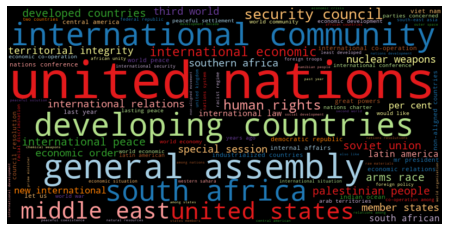

In [183]:
plt.figure(figsize=(12,4))
wordcloud(freq_1970_df['freq'], max_words=100)

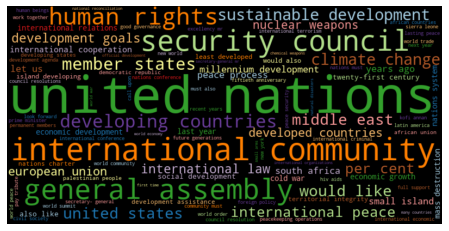

In [184]:
plt.figure(figsize=(12,4))
wordcloud(freq_2015_df['freq'], max_words=100)

## 3.Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices

In [185]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline2) 
df.sample(3)

,session,year,country,country_name,speaker,position,text,bitokens,tokens
1293,35,1980,FRA,France,Francois-Poncet,NaN,"﻿In electing you Sir, to the presidency of the...","[electing, sir, presidency, thirty-fifth, sess...","[electing, sir, presidency, thirty-fifth, sess..."
5087,58,2003,HTI,Haiti,Jean-Bertrand Aristide,President,﻿It is my\nhonour to greet the President on be...,"[honour, greet, president, behalf, people, hai...","[honour, greet, president, behalf, people, hai..."
775,31,1976,NGA,Nigeria,Mr. Garba,NaN,The election of Ambassador. Amerasinghe to pre...,"[election, ambassador, amerasinghe, preside, s...","[election, ambassador, amerasinghe, preside, s..."


In [186]:
keywords1 = ['climate change','global warming','human rights']
keywords2 = ['war','people','government']

In [187]:
def count_keywords_by(df, by, keywords, column='bitokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [188]:
freq_bi_df = count_keywords_by(df, by='year', keywords=keywords1)

In [157]:
freq_bi_df

,climate change,global warming,human rights
year,,,
1970,0,0,143
1971,0,0,119
1972,0,0,124
1973,0,0,200
1974,0,0,127
1975,0,0,212
1976,0,0,349
1977,0,0,645
1978,0,0,648


In [158]:
freq_uni_df = count_keywords_by(df, by='year', keywords=keywords2 , column = 'tokens')

In [159]:
freq_uni_df

,war,people,government
year,,,
1970,360,649,541
1971,468,1321,1040
1972,562,1300,1004
1973,612,1287,1015
1974,466,1490,1174
1975,497,1410,884
1976,419,1714,1055
1977,428,1714,984
1978,394,1702,1002


<AxesSubplot:xlabel='year'>

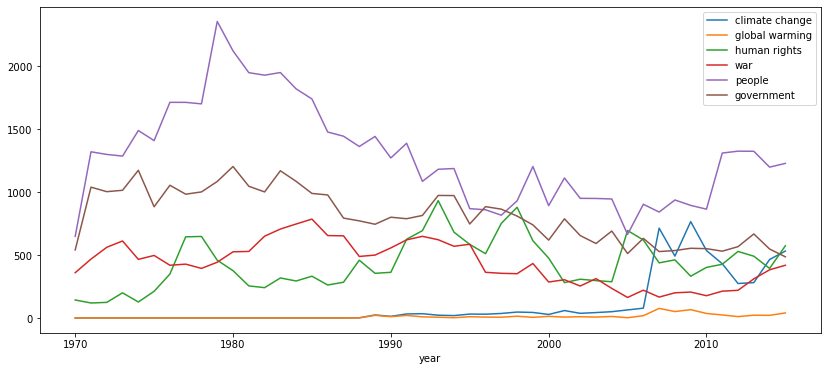

In [166]:
ax = freq_bi_df.plot(kind='line', figsize=(14,6))
freq_uni_df.plot(ax=ax)